In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.io import loadmat
import cmath
import wave, sys
import librosa
import IPython.display as ipd
from scipy.signal import filtfilt, butter, lfilter, freqz
import statsmodels.api as sm
from scipy import signal

# Question 1

In [24]:
# estimated the same signal with LP model, computed the error, found the peaks, and then found its LP spectrum

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Apr 07 19:05:18 2017', '__version__': '1.0', '__globals__': [], 'ecgSignal': array([[995, 995, 995, ..., 946, 944, 943]], dtype=uint16)}


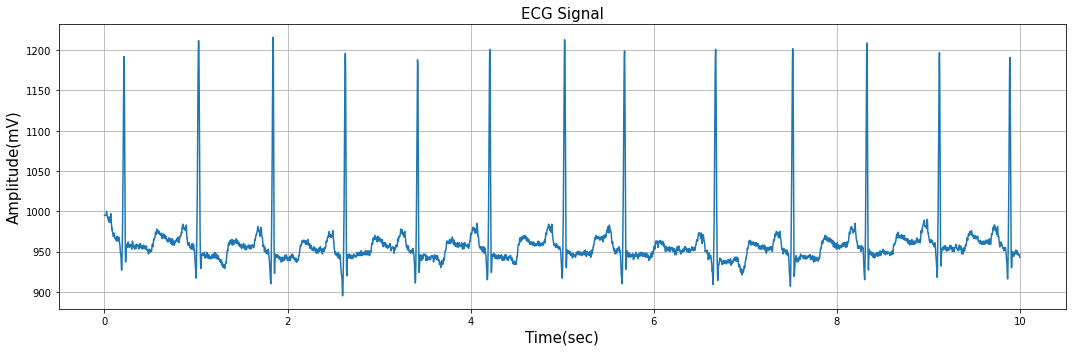

In [27]:
# Finding peaks in ECG signal
# Reading the given ECG signal
data = loadmat(r"C:\Users\Venkatesh Yeturi\OneDrive\Desktop\Class pdfs\Biomedical Signal Processing\Assignments\Assignment7\ecgSignal.mat")
print(data)

Fs = 360   # Sampling Frequency
x1 = data['ecgSignal']
X1 = x1[0]
N = len(X1)
t = np.linspace(0,N/Fs,N)

plt.figure(figsize=(15,5))
plt.plot(t,X1)
plt.xlabel('Time(sec)',size='15')
plt.ylabel('Amplitude(mV)',size='15')
plt.title('ECG Signal',size='15')
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
#calculate autocorrelations of the ECG signal
R = sm.tsa.acf(X1)

R1 = [[R[0],R[1]],[R[1],R[0]]]
R2 = [[R[1]],[R[2]]]

# Calculating the LP Filter Coefficients
a = np.dot(np.linalg.inv(R1),R2)

print(f'The LP Filter Coefficients are:\na1 = {a[0]},\na2 = {a[1]}')

The LP Filter Coefficients are:
a1 = [1.80209521],
a2 = [-0.8872773]


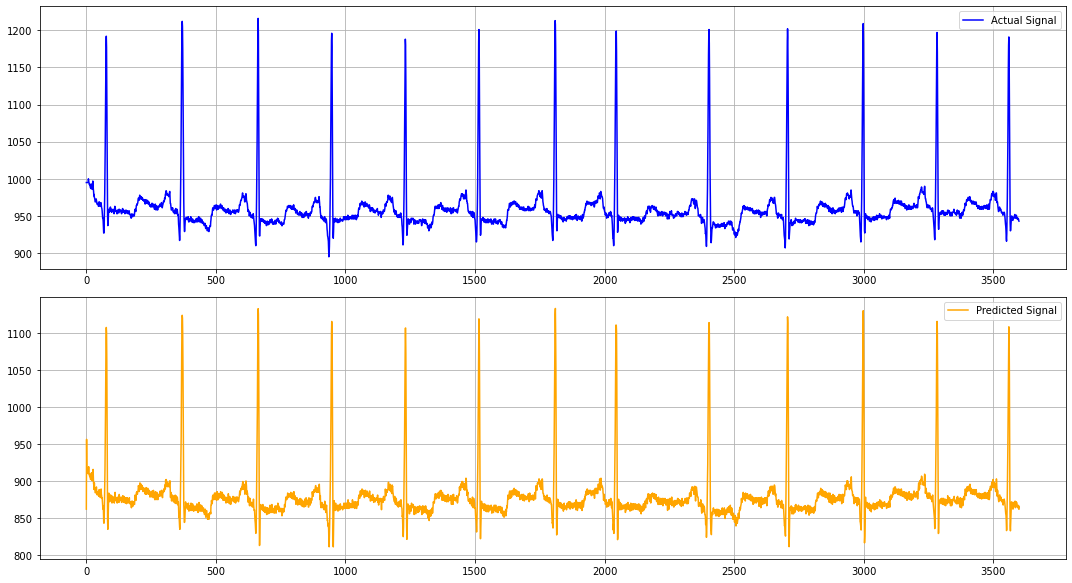

In [28]:
# Prediting signal from LP model
X_pred = np.zeros(N)
for i in range(N):
    X_pred[i] = float(a[0]*X1[i-1]) + float(a[1]*X1[i-2])
    
dc_shift = X1[3] - X_pred[3] # to uplift the predicted signal
X_pred += dc_shift

# Plotting the Original Signal and the Predicted Signal
plt.figure(figsize=(15,12))
plt.subplot(3,1,1)
plt.plot(X1, label = 'Actual Signal', color='blue')
plt.legend()
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(X_pred, label = 'Predicted Signal', color='orange')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

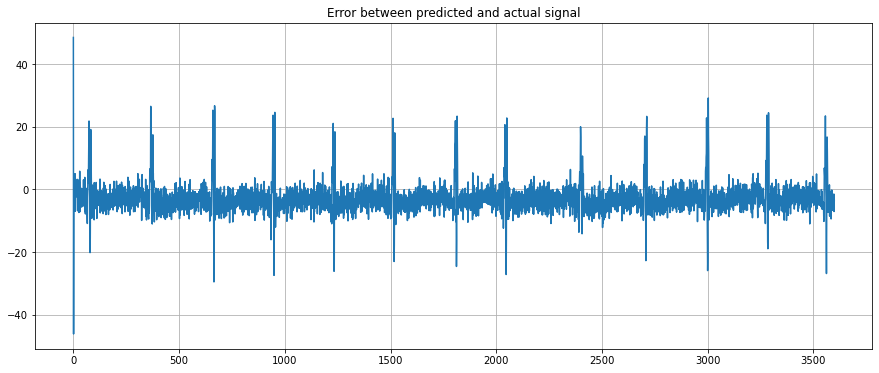

In [5]:
# Plotting the prediction error
error = X1-X_pred

plt.figure(figsize=(15,6))
plt.plot(error)
plt.grid(True)
plt.title('Error between predicted and actual signal')
plt.show()

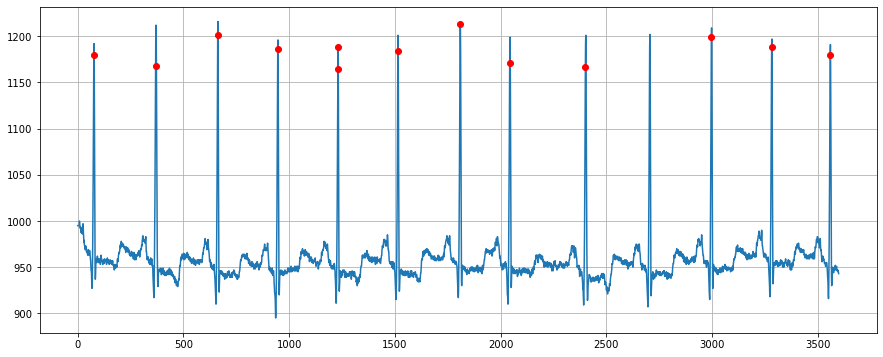

In [31]:
# peaks are located where error has sudden change
peak_index = []
Th = 19   # Threshold

for i in range(N):
    if error[i] >=Th:
        peak_index.append(i)
        
# Since LP model has a non-zero phase, the peaks will be shifted in time.
# So we shift the obtained peaks to get the actual peaks
t_shift = 2 # time shift
plt.figure(figsize=(15,6))
plt.plot(X1)
for i in peak_index:
    if X1[i+t_shift] > 1050:
        plt.plot(i+t_shift,X1[i+t_shift],'o',markersize='6',color='red')
        #plt.xlim(0,500)

plt.grid(True)
plt.show()

C:\anaconda\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


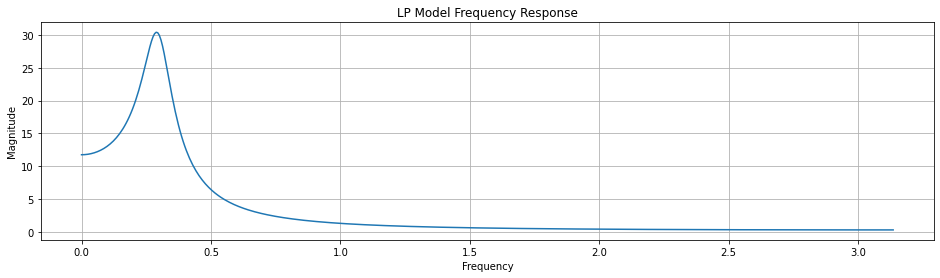

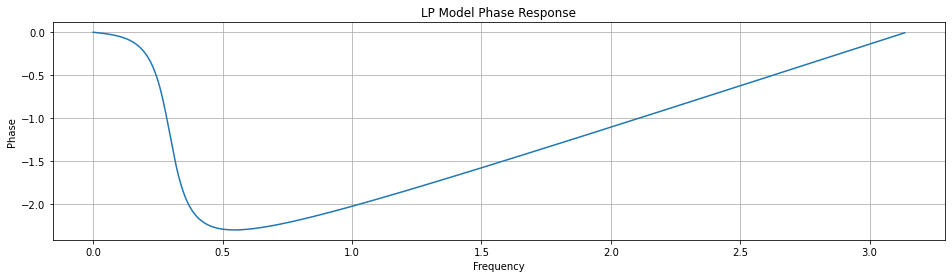

In [7]:
a1 = a[0]
a2 = a[1]
# Create the transfer function numerator and denominator coefficients
num = [1]
den = [1, -a1, -a2]

# Compute the frequency response
w, h = signal.freqz(num, den)

# Plot the magnitude response
plt.figure(figsize = (16,4))

plt.plot(w, np.abs(h))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('LP Model Frequency Response')
plt.grid(True)
plt.show()

# Plot the phase response
plt.figure(figsize = (16,4))
plt.plot(w, np.angle(h))
plt.xlabel('Frequency')
plt.ylabel('Phase')
plt.title('LP Model Phase Response')
plt.grid(True)
plt.show()


# 2nd Question

In [26]:
# formants : the frequencies at which the speech signal will contain high amount of content.
# correspond to peaks in the spectrum of the speech signal
# all the roots which correspond to bandwidth in the given range (90,400) are taken as formants

Playing the speech signal...


Visualising the speech signal for Vowel "a":


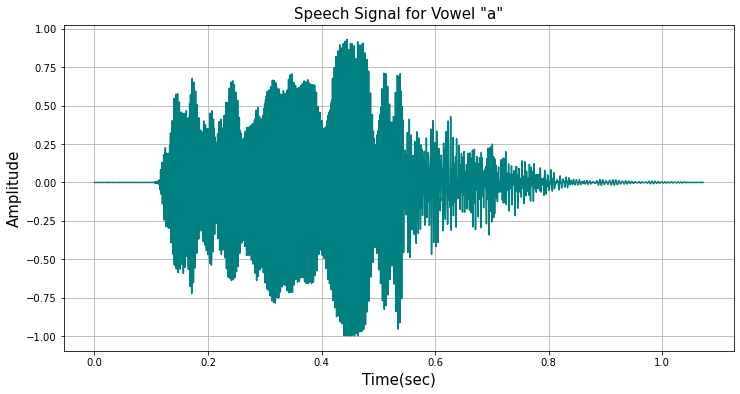

In [22]:
# Reading the speech signal

signal1, sr1 =librosa.load(r"C:\Users\Venkatesh Yeturi\OneDrive\Desktop\Class pdfs\Biomedical Signal Processing\Assignments\Assignment7\a.wav")
signal1 /= np.abs(signal1).max()      # Normalising the signal 
  
fs = 32000        # Sampling Frequency
N1 = len(signal1)
timePeriod = N1/fs
t = np.linspace(0,timePeriod,N1)

print('Playing the speech signal...')
display(ipd.Audio(signal1, rate = sr1 ))

print('Visualising the speech signal for Vowel "a":')
plt.figure(figsize=(12,6))
plt.plot(t,signal1, color='teal')
plt.xlabel('Time(sec)',size=15)
plt.ylabel('Amplitude',size=15)
plt.title('Speech Signal for Vowel "a"',size=15)
plt.grid()

Playing the speech signal for Vowel "e"...


Visualising the speech signal:


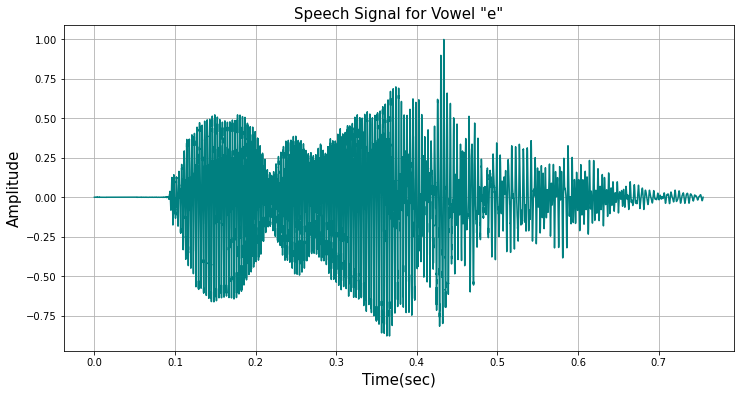

In [9]:
# Reading the speech signal

signal2, sr2 =librosa.load(r"C:\Users\Venkatesh Yeturi\OneDrive\Desktop\Class pdfs\Biomedical Signal Processing\Assignments\Assignment7\e.wav")
signal2 /= np.abs(signal2).max()      # Normalising the signal 
  
fs = 32000        # Sampling Frequency
N2 = len(signal2)
timePeriod = N2/fs
t = np.linspace(0,timePeriod,N2)

print('Playing the speech signal for Vowel "e"...')
display(ipd.Audio(signal2, rate = sr2 ))

print('Visualising the speech signal:')
plt.figure(figsize=(12,6))
plt.plot(t,signal2, color='teal')
plt.xlabel('Time(sec)',size=15)
plt.ylabel('Amplitude',size=15)
plt.title('Speech Signal for Vowel "e"',size=15)
plt.grid()

Playing the speech signal for Vowel "o"...


Visualising the speech signal:


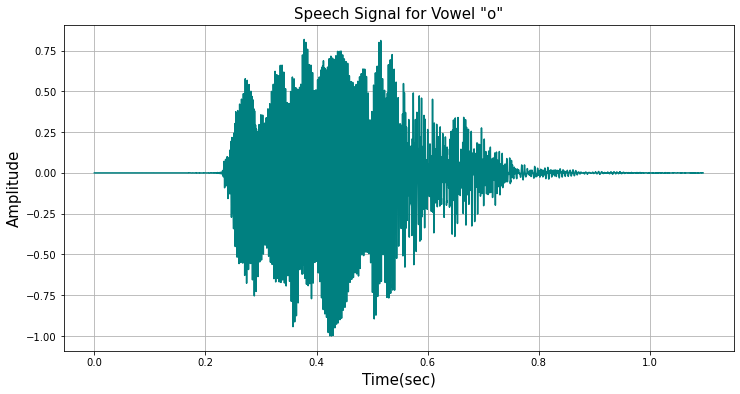

In [10]:
# Reading the speech signal

signal3, sr3 =librosa.load(r"C:\Users\Venkatesh Yeturi\OneDrive\Desktop\Class pdfs\Biomedical Signal Processing\Assignments\Assignment7\o.wav")
signal3 /= np.abs(signal3).max()      # Normalising the signal 
  
fs = 32000        # Sampling Frequency
N3 = len(signal3)
timePeriod = N3/fs
t = np.linspace(0,timePeriod,N3)

print('Playing the speech signal for Vowel "o"...')
display(ipd.Audio(signal3, rate = sr3 ))

print('Visualising the speech signal:')
plt.figure(figsize=(12,6))
plt.plot(t,signal3, color='teal')
plt.xlabel('Time(sec)',size=15)
plt.ylabel('Amplitude',size=15)
plt.title('Speech Signal for Vowel "o"',size=15)
plt.grid()

In [11]:
# preprocessing involves HPF filter as we try to enhance the spectral peaks in high frequency region
# Windowing the speech segment using a Hamming window
W1 = np.hamming(N1)
X1 = signal1 * W1

# Applying a pre-emphasis filter. The pre-emphasis filter is a Highpass all-pole (AR(1)) filter
X1 = lfilter([1], [1., 0.9], X1) # higher value in 1/(1-alpha*z^-1) boosts high frequency components more

print('Playing the speech signal for Vowel "a" after preprocesing...')
display(ipd.Audio(X1, rate = sr1 ))

Playing the speech signal for Vowel "a" after preprocesing...


In [12]:
# Windowing the speech segment using a Hamming window
W2 = np.hamming(N2)
X2 = signal2 * W2

# Applying a pre-emphasis filter. The pre-emphasis filter is a Highpass all-pole (AR(1)) filter
X2 = lfilter([1], [1., 0.8], X2)

print('Playing the speech signal for Vowel "a" after preprocesing...')
display(ipd.Audio(X2, rate = sr2 ))

Playing the speech signal for Vowel "a" after preprocesing...


In [13]:
# Windowing the speech segment using a Hamming window
W3 = np.hamming(N3)
X3 = signal3 * W3

# Applying a pre-emphasis filter. The pre-emphasis filter is a Highpass all-pole (AR(1)) filter
X3 = lfilter([1], [1., 0.6], X3)

print('Playing the speech signal for Vowel "a" after preprocesing...')
display(ipd.Audio(X3, rate = sr3 ))

Playing the speech signal for Vowel "a" after preprocesing...


In [14]:
def get_formants(signal, fs):
    
    y = signal # now computing the LP model coefficients
    '''Computing Linear Prediction(LP) Coefficients. In general, 2(expected no.of formants)+2 = order'''
    # although it depends on the complexity of the speech signal
    
    coeff = librosa.lpc(y, order=10)   
    
    # Finding the roots of the prediction polynomial returned by lpc
    rts = np.roots(coeff)
    # complex roots occurs in pairs so consider only one of those two
    N = len(rts)
    roots = []
    for i in range(N):
        if (rts[i].imag>=0):
            roots.append(rts[i])
    
    # get the angles of all the roots in one array
    N1 = len(roots)
    angle = []
    for i in range(N1):
        angle.append(np.arctan(roots[i].imag/roots[i].real))
        
    # converting rad/samples to Hz
    frqs = np.zeros(N1)
    for i in range(N1):
        frqs[i] = angle[i] * (fs/(2*np.pi))
        
    angz = np.sort(frqs)
    # calculate bandwidth to identify formant frequencies
    bw = np.zeros(N1)
    
    # absolute value of root gives the distance from the origin
    # log is to convert the scale and -0.5 for bandwidth formula
    # multiply with (Fs/2*np.pi) is to convert from rad/samples to Hz
    for i in range(N1):
        bw[i] = -1/2  * np.log(abs(roots[i])) * (Fs/(2*np.pi)) 
    # In general we can classify formants as in range of(90, 400)
    formant = []
    for i in range(N1):
        if (frqs[i] > 90 and bw[i] < 400):
            formant.append(frqs[i])
            
    return np.sort(formant)

In [15]:
formant_freq1 = get_formants(X1,fs)

print(f'Formant Frequencies Vowel "a" are:\n{np.round(formant_freq1,2)} Hz')

Formant Frequencies Vowel "a" are:
[ 514.84 3823.29 4792.19 7645.28] Hz


In [16]:
formant_freq2 = get_formants(X2,fs)

print(f'Formant Frequencies for Vowel "e" are:\n{np.round(formant_freq2,2)} Hz')

Formant Frequencies for Vowel "e" are:
[ 337.93 3830.73 4665.11] Hz


In [17]:
formant_freq3 = get_formants(X3,fs)

print(f'Formant Frequencies Vowel "o" are:\n{np.round(formant_freq3,2)} Hz')

Formant Frequencies Vowel "o" are:
[ 555.67 1336.83 5164.35] Hz


#  Question 3

In [18]:
# pitch frequecy : fundemental frequency at which vocal cords vibrate while taking
# so number of vibrations per seconds (in Hertz)
# male - 85 to 180
# female - 165 to 255

def LP_spectrum(signal, vowel):

    b =[1]    # Numerator
    a = librosa.lpc(signal, order=10)    # Denominator

    ''' Frequency response of the LP filter gives frequency response of the signal '''
    w, h = freqz(b, a)    # Frequency response of the filter
    
    plt.figure(figsize=(12,6))
    #plt.semilogx(w, 20 * np.log10(abs(h)))
    plt.plot(w, 20 * np.log10(abs(h)), color='maroon')
    plt.xlabel('Normalized Frequency', size=12)
    plt.ylabel('Amplitude response [dB]', size=12)
    plt.title(f'LP Spectrum of \"{vowel}\"', size=15)
    plt.grid()
    plt.show()
    
    return (w,20*np.log10(abs(h)))

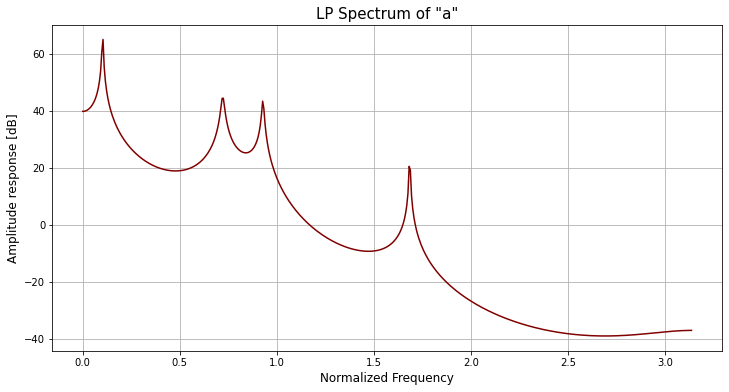

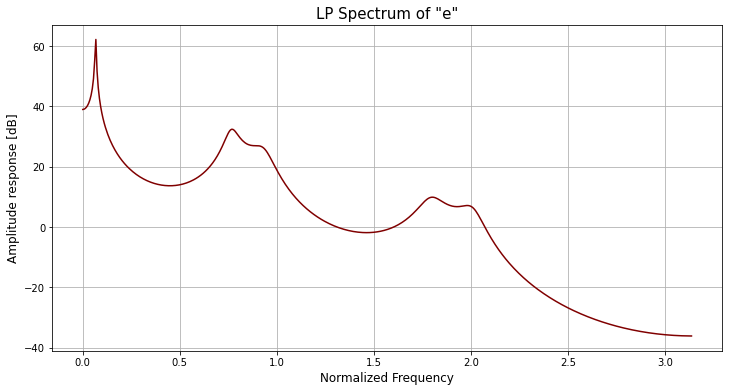

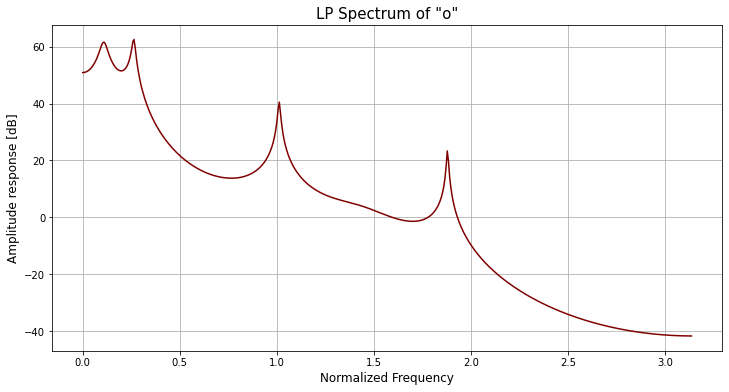

In [19]:
# Plotting the LP Spectrum of the Speech signal before Pre-emphasis 
a_indices,Spectrum1 = LP_spectrum(signal1,'a')
e_indices,Spectrum2 =LP_spectrum(signal2,'e')
i_indices,Spectrum3 =LP_spectrum(signal3,'o')

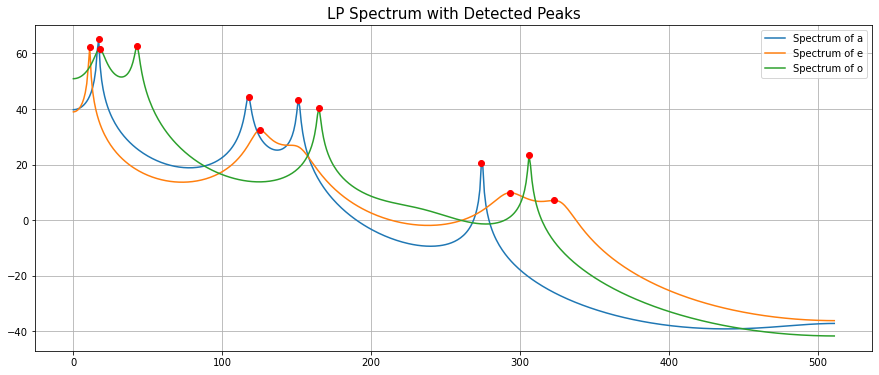

In [20]:
# detecting peaks from LP model
from scipy.signal import find_peaks
peaks1, _ = find_peaks(Spectrum1)
peaks2, _ = find_peaks(Spectrum2)
peaks3, _ = find_peaks(Spectrum3)

plt.figure(figsize=(15,6))

plt.plot(Spectrum1, label='Spectrum of a')
plt.plot(peaks1, Spectrum1[peaks1],'o',markersize='6',color='red')
plt.title('LP Spectrum with Detected Peaks',size='15')
plt.grid(True)

plt.plot(Spectrum2, label='Spectrum of e')
plt.plot(peaks2, Spectrum2[peaks2],'o',markersize='6',color='red')
plt.grid(True)

plt.plot(Spectrum3, label='Spectrum of o')
plt.plot(peaks3, Spectrum3[peaks3],'o',markersize='6',color='red')
plt.grid(True)

plt.legend()
plt.show()

In [23]:
# pitch frequency is like fundemental frequency and so correspond to first peak
pitch_freq1 = w[peaks1[0]] * fs/(2*np.pi)
pitch_freq2 = w[peaks2[0]] * fs/(2*np.pi)
pitch_freq3 = w[peaks3[0]] * fs/(2*np.pi)

print(f"Pitch Frequency for \'a\' is {pitch_freq1:.2f}Hz\n")
print(f"Pitch Frequency for \'e\' is {pitch_freq2:.2f}Hz\n")
print(f"Pitch Frequency for \'o\' is {pitch_freq3:.2f}Hz\n")

Pitch Frequency for 'a' is 531.25Hz

Pitch Frequency for 'e' is 343.75Hz

Pitch Frequency for 'o' is 562.50Hz

